50000


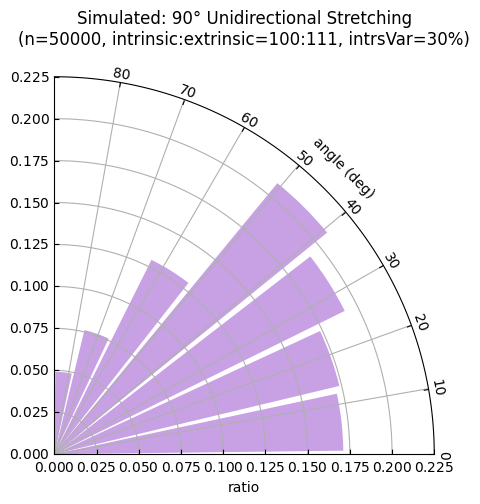

In [2]:
import random, math


number_of_samples = 50000

innate_division_force_mean = 100
innate_division_force_variation = 30


uniaxial_stretch_degree = 0
uniaxial_stretch_force = 111

x_coordinate_uniaxial_stretch = math.cos(math.radians(uniaxial_stretch_degree)) * uniaxial_stretch_force
y_coordinate_uniaxial_stretch = math.sin(math.radians(uniaxial_stretch_degree)) * uniaxial_stretch_force



angles = []
x_coordinates = []
y_coordinates = []
innate_division_force = []





### 마이너스가 0~180°에서는 표현이 안 되니 -pi/2 ~ +pi/2로 표현했다.

for i in range(number_of_samples):
    #이 값의 범위를 어떻게 하느냐에 따라서 0~360, 0~180, 0~90 이런 값을 조절할 수 있다.
    angles.append(random.uniform(0, 360))
    temp_division_force = random.uniform(innate_division_force_mean - innate_division_force_variation, 
                                         innate_division_force_mean + innate_division_force_variation)
    x_coordinates.append(math.cos(angles[-1]) * temp_division_force)
    y_coordinates.append(math.sin(angles[-1]) * temp_division_force)
    innate_division_force.append(temp_division_force)


new_angles = []
for i in zip(x_coordinates, y_coordinates):
    new_coordinate_x = i[0] + x_coordinate_uniaxial_stretch
    new_coordinate_y = i[-1] + y_coordinate_uniaxial_stretch
    
    new_coordinate_calculated_radian = math.acos(abs(new_coordinate_x)/(math.sqrt(new_coordinate_x**2 + new_coordinate_y**2)))
    new_angles.append(math.degrees(new_coordinate_calculated_radian))
    
    
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot
import mpl_toolkits.axisartist.grid_finder as gf

from collections import Counter
from math import radians


def generate_polar_axes():
    polar_trans = PolarAxes.PolarTransform()

    # Setup the axis, here we map angles in degrees to angles in radius
    phi_degree = np.arange(0, 90, 10)
    tlocs = phi_degree * np.pi / 180
    gl1 = gf.FixedLocator(tlocs)  # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, phi_degree))))

    # Standard deviation axis extent
    radius_min = 0
    radius_max = 0.225
    
    ####### 수동으로 꼭 바꿔주기 #######

    # Set up the axes range in the parameter "extremes"
    ghelper = GridHelperCurveLinear(polar_trans, extremes=(0, np.pi / 2,  # 1st quadrant
                                                           radius_min, radius_max),
                                    grid_locator1=gl1,
                                    tick_formatter1=tf1,
                                    )

    figure = plt.figure(figsize=(5,5))

    floating_ax = FloatingSubplot(figure, 111, grid_helper=ghelper)
    figure.add_subplot(floating_ax)

    # Adjust axes
    floating_ax.axis["top"].set_axis_direction("bottom")  # "Angle axis"
    floating_ax.axis["top"].toggle(ticklabels=True, label=True)
    floating_ax.axis["top"].major_ticklabels.set_axis_direction("top")
    floating_ax.axis["top"].label.set_axis_direction("top")
    floating_ax.axis["top"].label.set_text("angle (deg)")

    floating_ax.axis["left"].set_axis_direction("bottom")  # "X axis"
    floating_ax.axis["left"].label.set_text("ratio")


    floating_ax.axis["right"].set_axis_direction("top")  # "Y axis"
    floating_ax.axis["right"].toggle(ticklabels=True)
    floating_ax.axis["right"].major_ticklabels.set_axis_direction("left")
    floating_ax.axis["right"].label.set_text("ratio")

    floating_ax.axis["bottom"].set_visible(False)  # Useless

    # Contours along standard deviations
    floating_ax.grid(True)
    floating_ax.set_title("Simulated: 90° Unidirectional Stretching\n(n=50000, intrinsic:extrinsic=100:111, intrsVar=30%)\n")

    data_ax = floating_ax.get_aux_axes(polar_trans)  # return the axes that can be plotted on

    return figure, data_ax




read_degrees = new_angles




ranges = []
bins = 7
start = 0
end = 90
incremental = end/bins

indices = end

while start < indices:
    ranges.append(indices)
    indices -= incremental
    

frequencies = {}
for i in ranges:
    frequencies[i] = len([j for j in read_degrees if float(j) <= i and float(j) > i - incremental]) if i != end/bins else len([j for j in read_degrees if float(j) <= i])
    



# Plot data onto the defined polar axes
fig, ax = generate_polar_axes()

theta = [radians(i-(end/bins/2)) for i in list(frequencies.keys())]

radius = [i/sum(list(frequencies.values())) for i in list(frequencies.values())]

#ax.scatter(theta, radius)
ax.bar(theta, radius, width=0.2, color=(199/255, 161/255, 227/255,1))
print(str(sum(list(frequencies.values()))))

fig.savefig("stretching_small_simulated.png", dpi=200)